In [1]:
from qutip import *
import numpy as np
from qudpy.Classes import *
import qudpy.plot_functions as pf
import ufss  # diagram generation

In [2]:
w  = 1.0
w0 = 1.0

g = 1.0
gc = np.sqrt(w * w0)/2 # critical coupling strength

kappa = 0.05 
gamma = 0.15
M = 10    # needed only for high coupling strengths
N = 2
j = N/2    # unfort. this is a real.
n = N+1    # needs to be integer for qeye()

print("critical coupling strength = ",gc)

a  = tensor(destroy(M), qeye(n))
Jp = tensor(qeye(M), jmat(j, '+'))
Jm = tensor(qeye(M), jmat(j, '-'))
Jz = tensor(qeye(M), jmat(j, 'z'))

H0 = w * a.dag() * a + w0 * Jz
H1 =  (a + a.dag()) * (Jp + Jm)/np.sqrt(N)
H = H0 + g * H1

print("dimensionality of Hilbert-space: ",H.shape)

critical coupling strength =  0.5
dimensionality of Hilbert-space:  (30, 30)


In [3]:
# average number thermal photons in the bath coupling to the resonator
n_th = 0.25
c_ops = [np.sqrt(kappa * (n_th + 1)) * a, np.sqrt(kappa * n_th) * a.dag(),np.sqrt(gamma)*Jz]

#c_ops = [sqrt(kappa) * a, sqrt(gamma) * Jm]


In [4]:
g_vec = np.linspace(0.01, 1, 20)

# Ground state for the Hamiltonian: H = H0 + g * H1
rho_ss_list = [steadystate(H0 + g * H1, c_ops) for g in g_vec]

In [5]:
# calculate the expectation value of the number of photons in the cavity
n_ss_vec = expect(a.dag() * a, rho_ss_list)
n2_ss_vec = expect(a.dag() * a*a.dag() * a, rho_ss_list)
Jz_ss_vec = expect(Jz, rho_ss_list)  

a_ss_vec = expect(a,rho_ss_list)

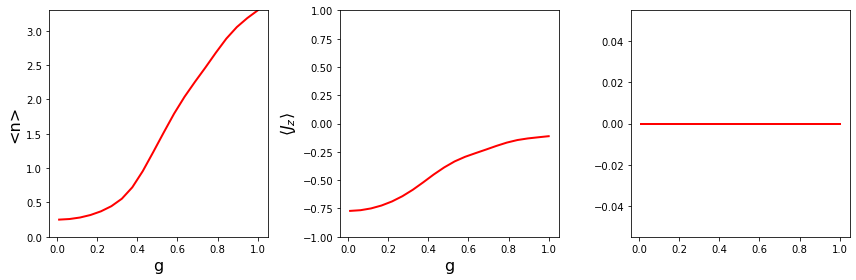

In [6]:


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12,4))

axes[0].plot(g_vec, n_ss_vec, 'r', linewidth=2, label="cavity occupation")
axes[0].set_ylim(0, max(n_ss_vec))
axes[0].set_ylabel("<n>", fontsize=16)
axes[0].set_xlabel("g", fontsize=16)

axes[1].plot(g_vec, Jz_ss_vec, 'r', linewidth=2, label="<Jz>")
axes[1].set_ylim(-j, j)
axes[1].set_ylabel(r"$\langle J_z\rangle$", fontsize=16)
axes[1].set_xlabel("g", fontsize=16)

axes[2].plot(g_vec,abs(a_ss_vec),'r',linewidth=2,label="<a>")

fig.tight_layout()


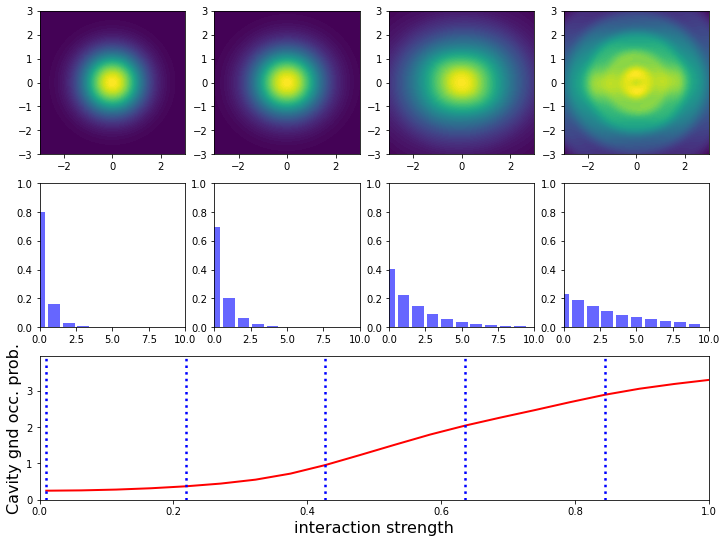

In [7]:
rho_ss_sublist = rho_ss_list[::5]

xvec = np.linspace(-3,3,200)

fig_grid = (3, len(rho_ss_sublist))
fig = plt.figure(figsize=(3*len(rho_ss_sublist),9))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    ax = plt.subplot2grid(fig_grid, (0, idx))
    ax.contourf(xvec, xvec, W, 100)
    
    # plot its fock-state distribution
    ax = plt.subplot2grid(fig_grid, (1, idx))
    ax.bar(np.arange(0, M), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, M)  
   
    
# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (2, 0), colspan=fig_grid[1])
ax.plot(g_vec, n_ss_vec, 'r', linewidth=2, label="cavity occupation")
ax.set_xlim(0, max(g_vec))
ax.set_ylim(0, max(n_ss_vec)*1.2)
ax.set_ylabel("Cavity gnd occ. prob.", fontsize=16)
ax.set_xlabel("interaction strength", fontsize=16)

for g in g_vec[::4]:
    ax.plot([g,g],[0,max(n_ss_vec)*1.2], 'b:', linewidth=2.5)

# Nonlinear response calculation

the rephasing diagrams are R1, R2 and R3  (('Bu', 0), ('Ku', 1), ('Bd', 2)) (('Bu', 0), ('Bd', 1), ('Ku', 2)) (('Bu', 0), ('Ku', 1), ('Ku', 2))


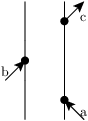

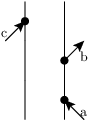

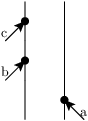

In [8]:
#Setting up the required double sided diagrams for tests
# DiagramGenerator class, or DG for short
DG = ufss.DiagramGenerator
# initialize the module
R3rd = DG()  # DG takes a single key-word argument, which has the default value detection_type = 'polarization'
# DiagramAutomation needs to know the phase-matching/-cycling condition
R3rd.set_phase_discrimination([(0, 1), (1, 0), (1, 0)])  # setting phase-matching condition for rephasing diagrams R1,2,3
# Set the pulse durations for pulses 0,1,2 and the local oscillator
d0 = 2
d1 = 4
d2 = 4
dlo = 6
# Set the pulse intervals
t0 = np.array([-d0 / 2, d0 / 2])
t1 = np.array([-d1 / 2, d1 / 2])
t2 = np.array([-d2 / 2, d2 / 2])
tlo = np.array([-dlo / 2, dlo / 2])
all_pulse_intervals = [t0, t1, t2, tlo]

# These pulse intervals are given to DG by setting DG's efield_times attribute
R3rd.efield_times = all_pulse_intervals
time_ordered_diagrams_rephasing = R3rd.get_diagrams([0, 100, 200, 200]) # selecting pulse arrival times to ensure no pulses overlap.
[R3, R1, R2] = time_ordered_diagrams_rephasing
rephasing = [R1, R2, R3]
print('the rephasing diagrams are R1, R2 and R3 ', R1, R2, R3)
R3rd.display_diagrams(rephasing)

critical coupling strength =  0.5
dimensionality of Hilbert-space:  (84, 84)
finding steady-states of the DM
Steady State Properties
<n> =  0.49493206396913897
<n^2> =  (0.8923863381618465-9.35333485027601e-18j)
<(n-<n>)^2> =  (0.6474285902170946-9.35333485027601e-18j)
system initialized
system has been intialized
total diagrams 1 , total interactions  3
('Bu', 0)
('Ku', 1)
('Bd', 2)
('Bu', 0)
('Ku', 1)
('Bd', 2)
('Bu', 0)
('Ku', 1)
('Bd', 2)


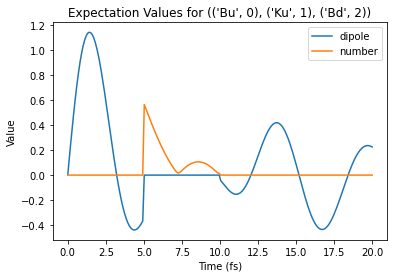

finished setup stage


In [35]:
w  = 1.0
w0 = 1.0

g = .25
gc = np.sqrt(w * w0)/2 # critical coupling strength

kappa = 0.05 
gamma = 0.15
M = 4
N = 20
j = N/2    # unfort. this is a real.
n = N+1    # needs to be integer for qeye()

print("critical coupling strength = ",gc)

a  = tensor(destroy(M), qeye(n))
Jp = tensor(qeye(M), jmat(j, '+'))
Jm = tensor(qeye(M), jmat(j, '-'))
Jz = tensor(qeye(M), jmat(j, 'z'))

H0 = w * a.dag() * a + w0 * Jz
H1 =  (a + a.dag()) * (Jp + Jm)/np.sqrt(N)
H = H0 + g * H1

print("dimensionality of Hilbert-space: ",H.shape)

en,T = H.eigenstates()

Hd=H.transform(T)

# average number thermal photons in the bath coupling to the resonator
n_th = 0.25
c1 = np.sqrt(kappa * (n_th + 1)) * a
c2 = np.sqrt(kappa * n_th) * a.dag()
c3 = np.sqrt(gamma)*Jz



c1d =c1.transform(T)
c2d =c2.transform(T)
c3d =c3.transform(T)


# A and A.dag() are now the excitation/de-excitation operators due to the coupling to the external photon-field
# and we need x-form this to the eigenbasis
A = a.transform(T)

mud = A + A.dag()



print("finding steady-states of the DM")
#define density matrix as steady-state in the eigenbasis
rhoSS=steadystate(Hd, [c1d,c2d,c3d]) 


# properties of the SS system (need to use transformed operators )
n_ss = expect(A.dag() * A, rhoSS)
n2_ss = expect(A.dag()*A*A.dag()*A,rhoSS)

print("Steady State Properties")
print("<n> = ",n_ss)
print("<n^2> = ",n2_ss)
print("<(n-<n>)^2> = ",n2_ss-n_ss*n_ss)


sys2 = System(H=Hd,a=A,u=mud,c_ops=[c1d,c2d,c3d],rho=rhoSS,diagonalize=False)
sys2.hbar=1
print("system has been intialized")

states = sys2.diagram_donkey([0, 5, 10, 20], [R1], r=10)

print("finished setup stage")

In [10]:
states = qload('dicke_2dcoherence_states_2spin_res1')
dipole = qload('dicke_2dcoherence_dipole_2spin_res1')

In [11]:
spectra_list, extent, f1, f2 = sys2.spectra(np.imag(dipole), resolution=1)

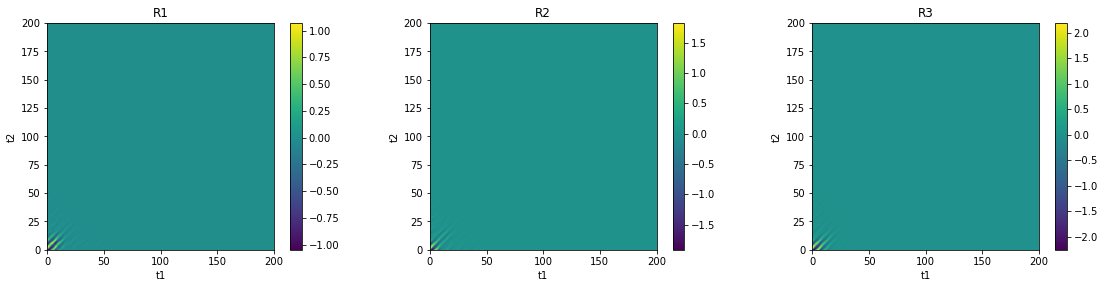

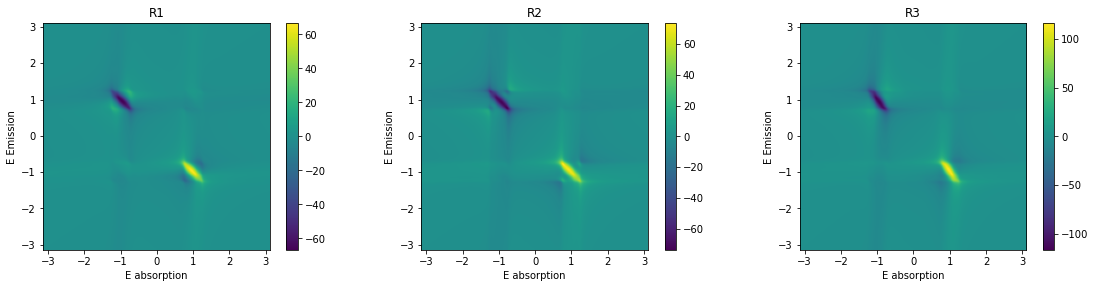

In [12]:
pf.multiplot(np.imag(dipole), [0, 200, 0, 200], ['t1', 't2'], ['R1', 'R2', 'R3'], 'linear', interpolation=None)
pf.multiplot(np.imag(spectra_list), extent, ['E absorption', 'E Emission'], ['R1', 'R2', 'R3'], 'linear', interpolation=None)

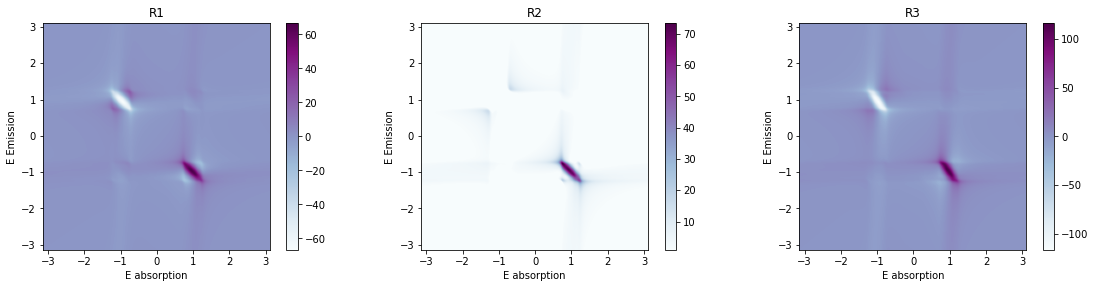

In [30]:
import qudpy.plot_functions as pf
pf.multiplot2(np.imag(spectra_list), extent, ['E absorption', 'E Emission'], ['R1', 'R2', 'R3'], 'linear', color_map='BuPu')

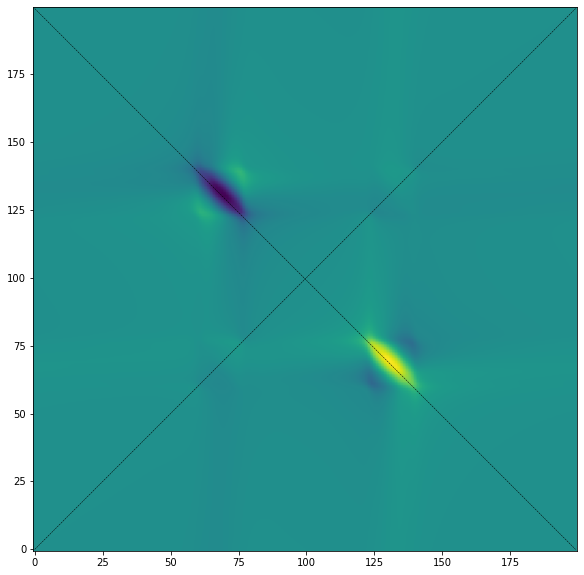

In [34]:
plt.figure(figsize = (10,10))
plt.imshow(np.imag(spectra_list[0]), origin='lower')
plt.plot([0, len(spectra_list[0])-1], [len(spectra_list[0])-1, 0], '--', color="black", linewidth=0.5)
plt.plot([0, len(spectra_list[0])-1], [0, len(spectra_list[0])-1], '--', color="black", linewidth=0.5)
plt.show()

NameError: name 'title_list' is not defined

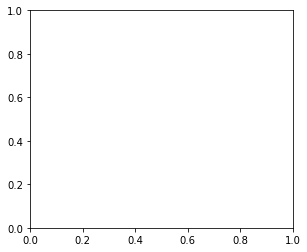

In [33]:
data = np.imag(spectra_list)

num_plots = len(data)  # number of plots (depends on the length of data list)
if num_plots <= 3:
    rows = 1
    cols = num_plots
else:
    rows = int(np.ceil(num_plots / 3))
    cols = 3

axes = []
fig = plt.figure(figsize=(16, 4))
for k in range(num_plots):
    axes.append(fig.add_subplot(rows, cols, k + 1))
    subplot_title = (title_list[k])
    axes[-1].set_title(subplot_title)
    # for diagonal and cross diagonal lines
    plt.plot([0, len(data[k]) - 1], [len(data[k]) - 1, 0], '--', color="black", linewidth=0.5)
    plt.plot([0, len(data[k]) - 1], [0, len(data[k]) - 1], '--', color="black", linewidth=0.5)
    im = plt.imshow(data[k], cmap=color_map, origin='lower', interpolation=interpolation, extent=scan_range,
                    aspect=1)
    if labels:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    plt.colorbar(im, ax=axes[-1])

fig.tight_layout()
plt.show()

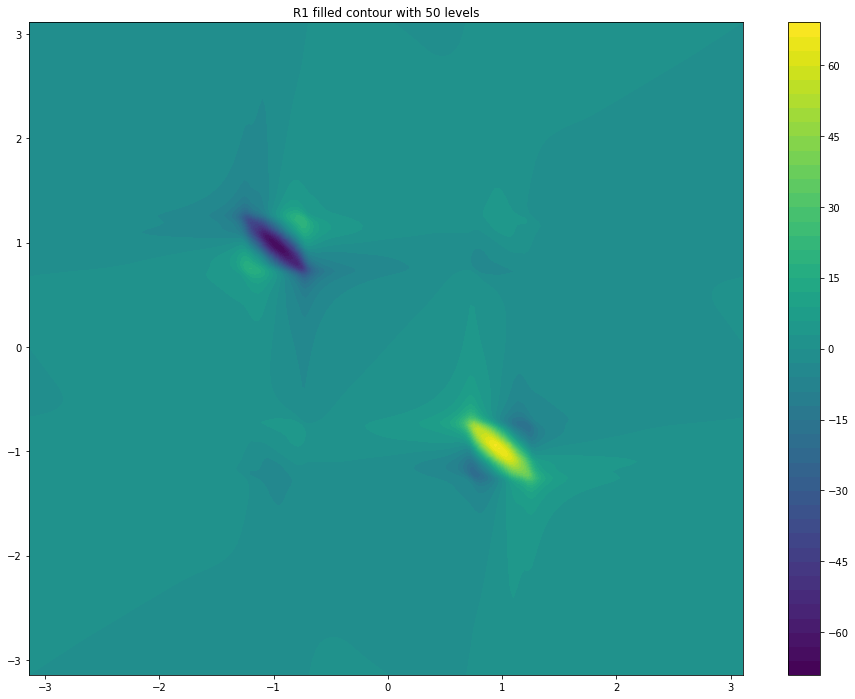

In [15]:
levels = 50
plt.figure(figsize=(16,12))
cs = plt.contourf(f1, f2, np.imag(spectra_list[0]),levels,
                  cmap ='viridis')
  
cbar = plt.colorbar(cs)
  
plt.title('R1 filled contour with '+str(levels) +' levels')
plt.show()

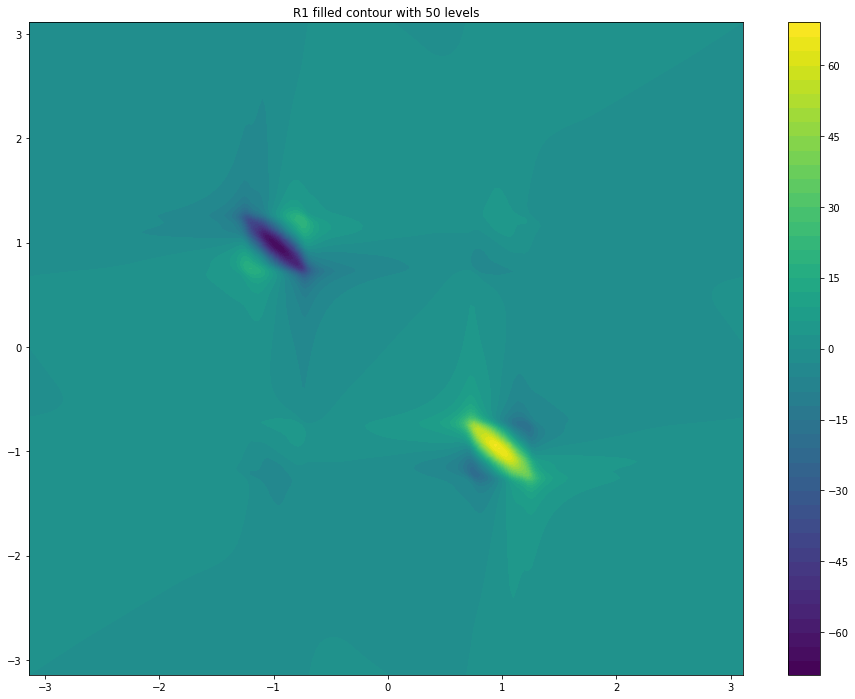

In [16]:
levels = 50
plt.figure(figsize=(16,12))
cs = plt.contourf(f1, f2, np.imag(spectra_list[0]),levels,
                  cmap ='viridis')
  
cbar = plt.colorbar(cs)
  
plt.title('R1 filled contour with '+str(levels) +' levels')
plt.show()

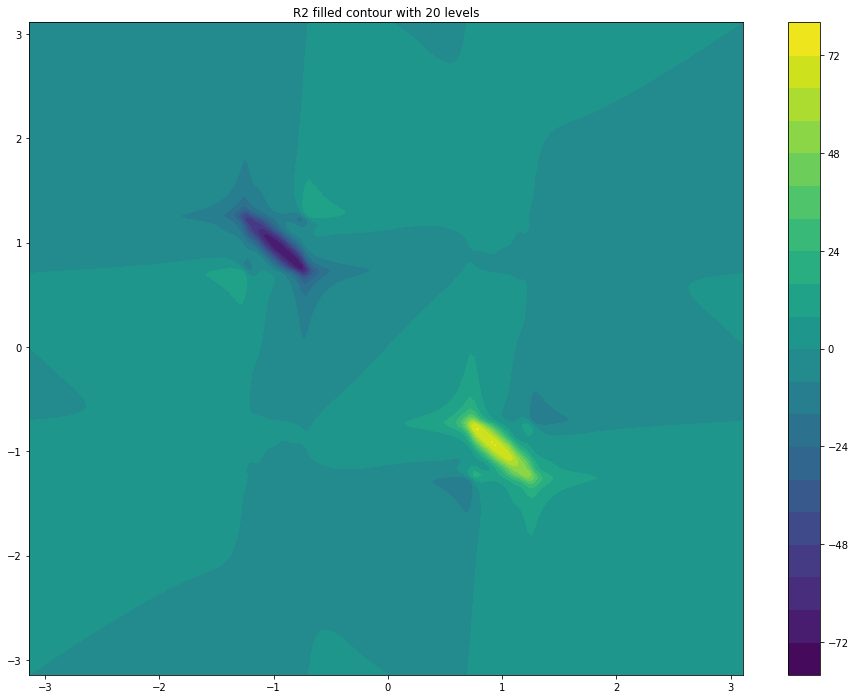

In [17]:
levels = 20
plt.figure(figsize=(16,12))
cs = plt.contourf(f1, f2, np.imag(spectra_list[1]),levels,
                  cmap ='viridis')
  
cbar = plt.colorbar(cs)
  
plt.title('R2 filled contour with '+str(levels) +' levels')
plt.show()

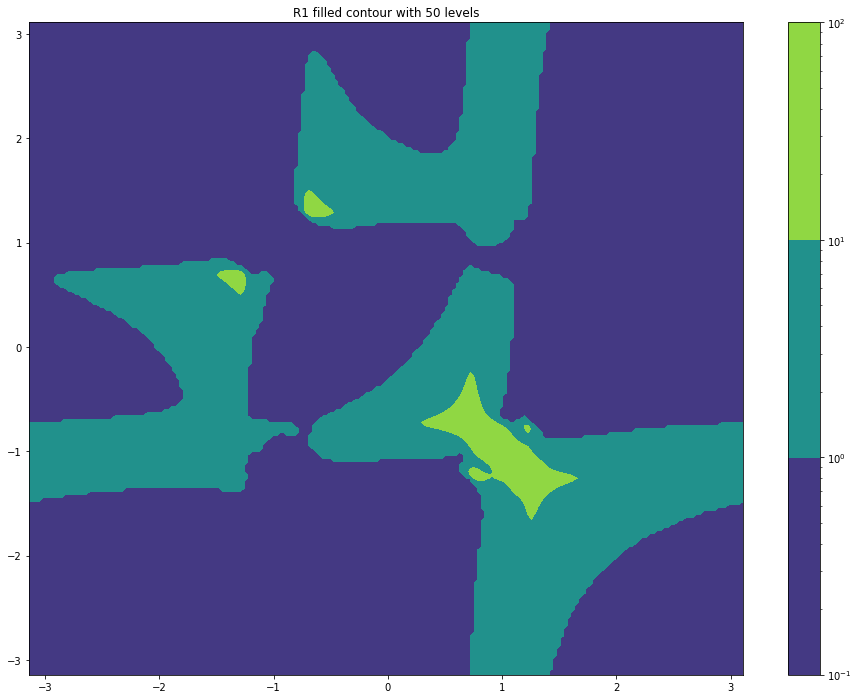

In [18]:
spec = np.imag(spectra_list[1])
spec[spec <1] = 1

from matplotlib import ticker
levels = 50
plt.figure(figsize=(16,12))
cs = plt.contourf(f1, f2, spec,locator = ticker.LogLocator(),
                  cmap ='viridis')
  
cbar = plt.colorbar(cs)
  
plt.title('R1 filled contour with '+str(levels) +' levels')
plt.show()


In [19]:
np.min(np.imag(spectra_list[1]))

1.0

In [20]:
np.max(np.imag(spectra_list[1]))

73.40415476592804

In [21]:
np.log()

ValueError: invalid number of arguments

In [ ]:
np.log(np.linspace(1, np.exp(73), 20))

In [ ]:
np.min(np.imag(spectra_list[1]))

In [ ]:
np.max(np.imag(spectra_list[1]))

In [ ]:
np.log()

In [ ]:
np.log(np.linspace(1, np.exp(73), 20))

In [ ]:
def dummy(**kwargs):
    print(x)
    print(y)
kwargs = {"x":1, "y":2}
dummy(**kwargs)

In [ ]:
kwargs={'x':1, 'y':1}

In [ ]:
kwargs

In [ ]:
for key, value in kwargs.items():
    print(key, value)

In [ ]:
def myFun(arg1, arg2, arg3):
	print("arg1:", arg1)
	print("arg2:", arg2)
	print("arg3:", arg3)


# Now we can use *args or **kwargs to
# pass arguments to this function :
args = ("Geeks", "for", "Geeks")
myFun(*args)

kwargs = {"arg1": 1, "arg2": 2, "arg3": 3}
myFun(**kwargs)


In [ ]:
np.max(np.imag(spectra_list[1]))

In [ ]:
np.log()

In [ ]:
np.log(np.linspace(1, np.exp(73), 20))

In [ ]:
def dummy(**kwargs):
    print(x)
    print(y)
kwargs = {"x":1, "y":2}
dummy(**kwargs)

In [ ]:
kwargs={'x':1, 'y':1}

In [ ]:
kwargs

In [ ]:
for key, value in kwargs.items():
    print(key, value)

In [ ]:
def myFun(arg1, arg2, arg3):
	print("arg1:", arg1)
	print("arg2:", arg2)
	print("arg3:", arg3)


# Now we can use *args or **kwargs to
# pass arguments to this function :
args = ("Geeks", "for", "Geeks")
myFun(*args)

kwargs = {"arg1": 1, "arg2": 2, "arg3": 3}
myFun(**kwargs)


In [ ]:
import concurrent.futures

In [ ]:
def square(x):
    return x**2



In [ ]:
with concurrent.futures.ProcessPoolExecutor as executor:
    l1 = [1,2,3,4,5]
    l = executor.map(square, l1)
for l2 in l:
    print(l2)

In [ ]:
np.max(np.imag(spectra_list[1]))

In [ ]:
np.log()

In [ ]:
np.log(np.linspace(1, np.exp(73), 20))

In [ ]:
def dummy(**kwargs):
    print(x)
    print(y)
kwargs = {"x":1, "y":2}
dummy(**kwargs)

In [ ]:
kwargs={'x':1, 'y':1}

In [ ]:
kwargs

In [ ]:
for key, value in kwargs.items():
    print(key, value)

In [ ]:
def myFun(arg1, arg2, arg3):
	print("arg1:", arg1)
	print("arg2:", arg2)
	print("arg3:", arg3)


# Now we can use *args or **kwargs to
# pass arguments to this function :
args = ("Geeks", "for", "Geeks")
myFun(*args)

kwargs = {"arg1": 1, "arg2": 2, "arg3": 3}
myFun(**kwargs)


In [ ]:
import concurrent.futures

In [ ]:
def square(x):
    return x**2



In [ ]:
with concurrent.futures.ProcessPoolExecutor as executor:
    l1 = [1,2,3,4,5]
    l = executor.map(square, l1)
for l2 in l:
    print(l2)